# Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Dataset : - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [279]:
df = pd.read_csv('train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [281]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

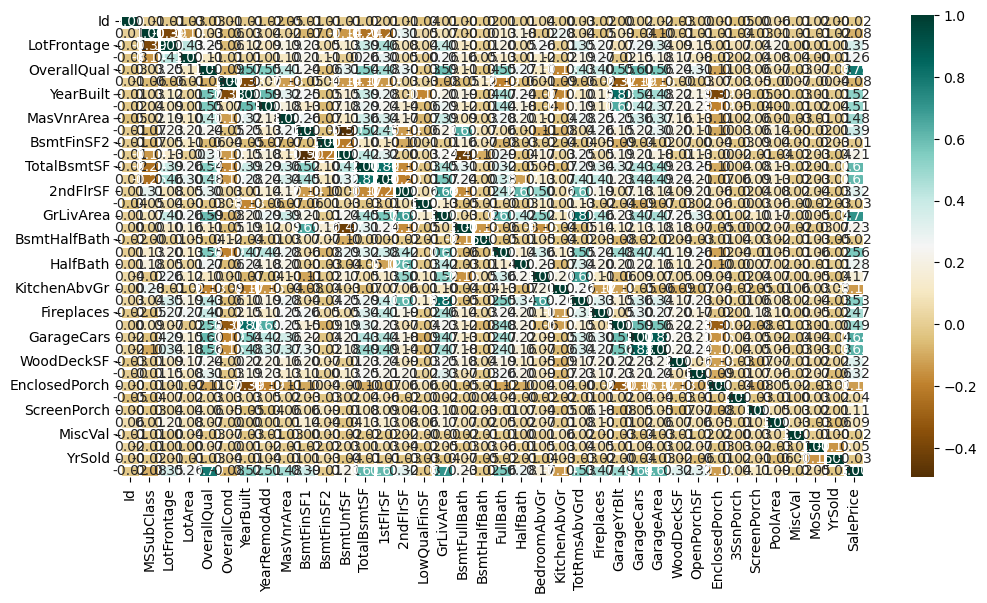

In [285]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
plt.show()

Categorical variables: 43


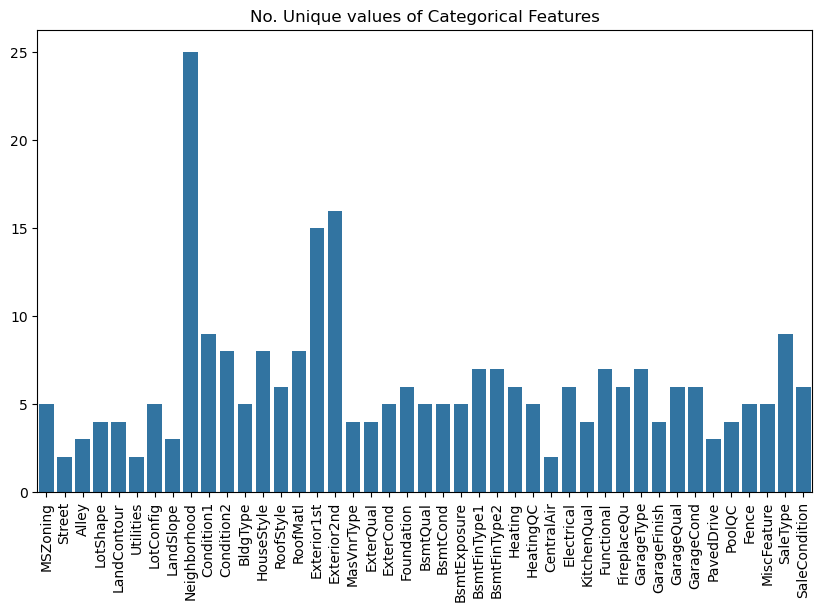

In [286]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)
plt.show()

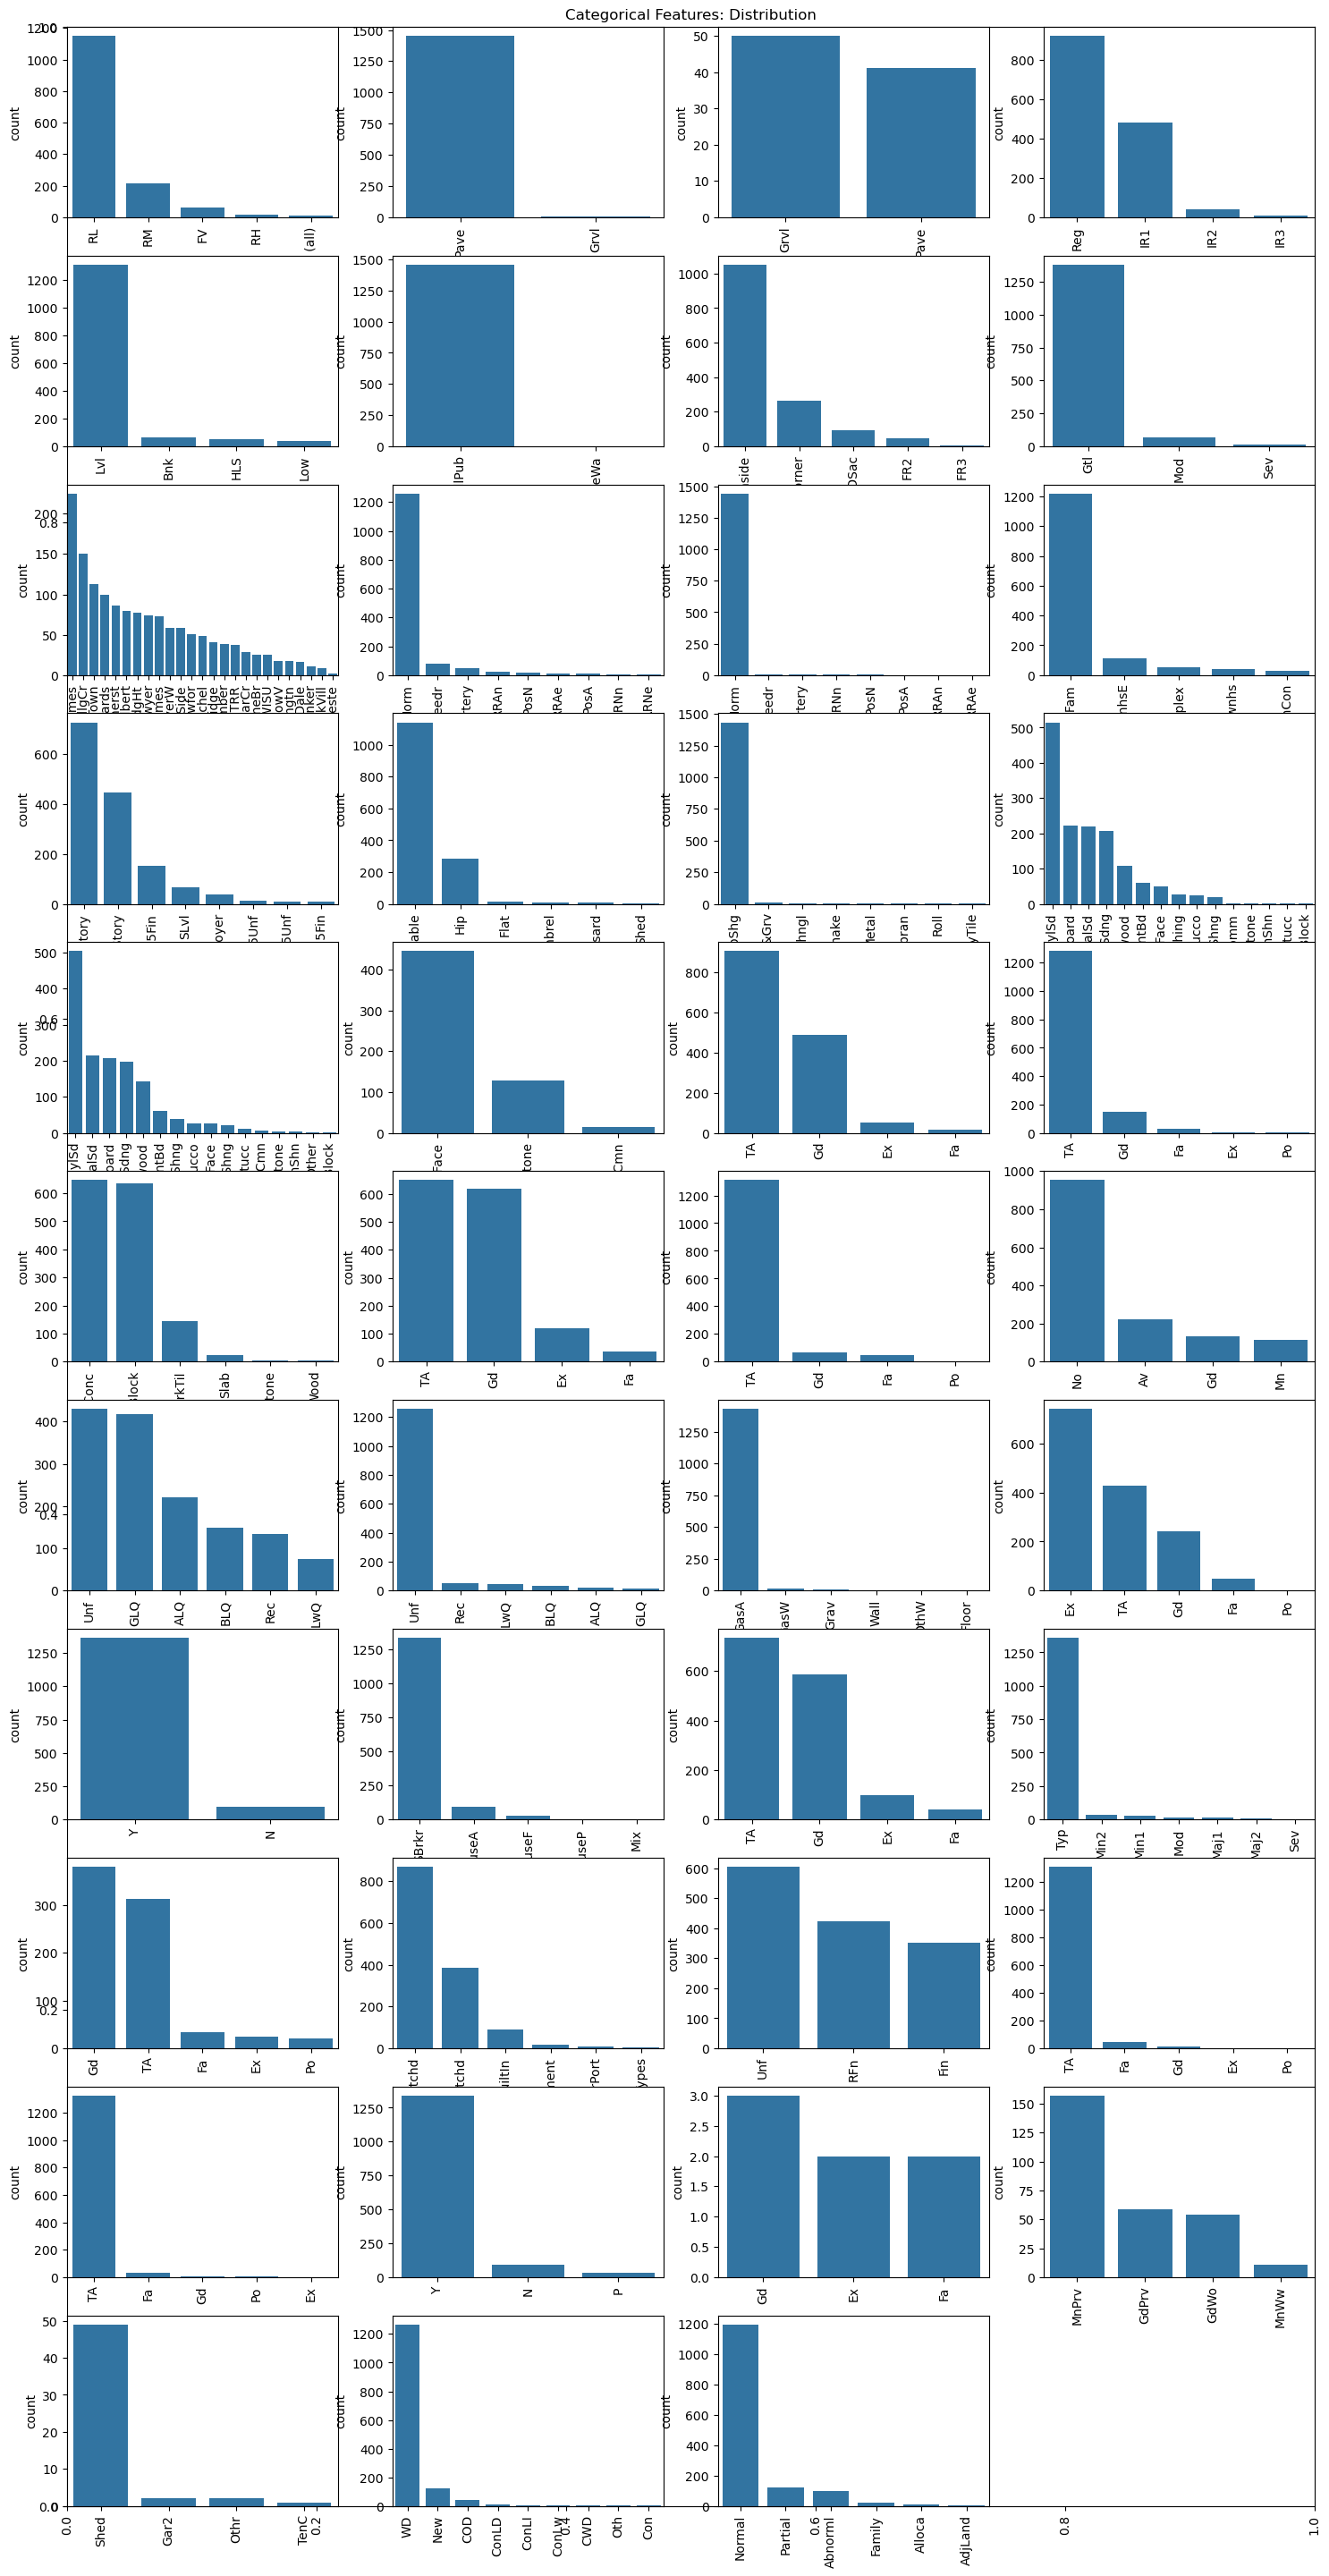

In [287]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

plt.show()

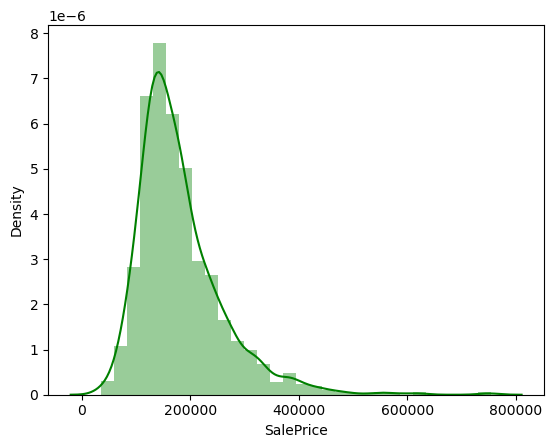

In [329]:
sns.distplot(df['SalePrice'], color ='green', bins = 30)
plt.show()

In [290]:
df.drop(['Id'], axis=1, inplace=True)

In [262]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean()) 

In [264]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [295]:
for i in list(df.columns):
    if df[i].dtypes == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].median())

In [297]:
df.shape

(1460, 80)

In [299]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [301]:
x = df[['LotArea', 'BedroomAbvGr','BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotalBsmtSF',  'FullBath']]
y = df['SalePrice']

In [303]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 44)

In [305]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [307]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [309]:
y_pred = reg.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['Predicted'])

y_pred

,Predicted
0,135070.857692
1,137525.913801
2,310026.837843
3,110370.336487
4,159247.906878
...,...
433,488935.565377
434,214284.430740
435,242122.782151
436,144081.911372


In [311]:
print(reg.intercept_, reg.coef_)

181980.915851272 [ 6175.51477769 -5431.35751704  8093.79212052  1461.5162236
 22109.67614122 36275.41658904 32239.4212675 ]


In [331]:
coeff_df = pd.DataFrame(reg.coef_, x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LotArea,6175.514778
BedroomAbvGr,-5431.357517
BsmtFullBath,8093.792121
BsmtHalfBath,1461.516224
HalfBath,22109.676141
TotalBsmtSF,36275.416589
FullBath,32239.421267


In [367]:
from sklearn import metrics

print('Mean Squared Error',mean_squared_error(y_test, y_pred))
print('\nR2 Score = ',r2_score(y_test,y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error 2112080268.663895

R2 Score =  0.6290613749443985

Root Mean Squared Error: 45957.374475310215


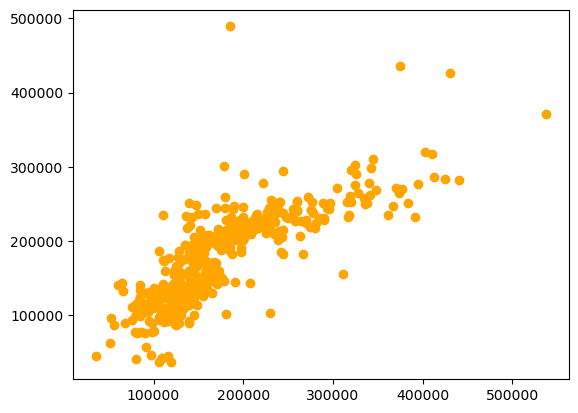

In [390]:
plt.scatter(y_test, y_pred, color = 'orange')
plt.show()

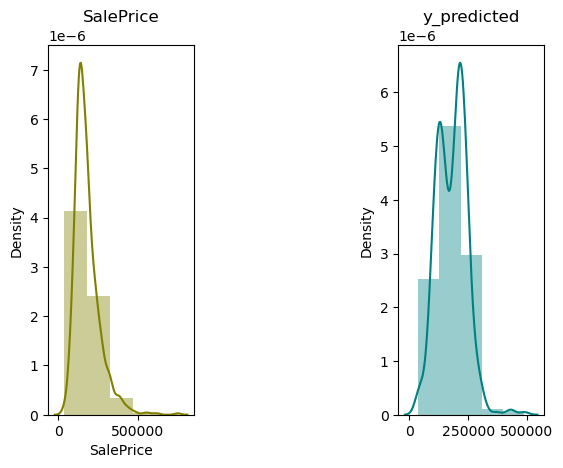

In [388]:
plt.subplot(1,3,1)
sns.distplot(df['SalePrice'], color= 'olive', bins=5)
plt.title('SalePrice')

plt.subplot(1,3,3)
sns.distplot(y_pred, color= '#008080', bins=5)
plt.title('y_predicted')

plt.show()